# Lab 3: Hypothesis Testing and Regression

- **Author:** Prof. Mu-Jeung Yang
- **Version:** Fall 2018
- **Course:** OAMO 3040: Business Econometrics II

### Learning Objectives:
By the end of the lab, you will be able to:

* feel comfortably designing formulas for linear regression modeling
* work comfortably with statsmodels library 
* create basic visualization of regression model

### References: 
 * [Scikit Learn Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
 * [Statsmodels](http://statsmodels.sourceforge.net/stable/index.html)
 * [Introduction to Statistical Learning, Lab #2](http://www-bcf.usc.edu/~gareth/ISL/Chapter%203%20Lab.txt)

#### Import libraries

These are libraries you worked with before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline  

#### New libraries

For the first time, we will work with the library *statsmodels* to enable regressions etc

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

### Import Boston Housing data

In [3]:
from sklearn.datasets import load_boston
bdata = load_boston()
bdata

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(bdata.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(bdata.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Convert data structure

To be able to more conveniently use the data, let's convert it to a pandas DataFrame:

In [6]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]

In [7]:
print(boston.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [8]:
boston['MEDV'] = bdata.target
print(boston.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### 0. Data exploration
We will build on what you already know from lab 2. 
#### <font color='blue'>EXCERCISE 1:</font>
<font color='blue'>a) Show that the dataset does not contain any missing values. (Hint: use the command *dropna* for DataFrames, such as the "boston"-DataFrame here).</font>

In [9]:
#Enter code
boston.dropna(inplace=True)

<font color='blue'>b) What is the median ratio of pupils to teachers and how does it differ from the mean?</font>

In [10]:
#Enter code
print('Median', boston['PTRATIO'].median())
print('Mean',boston['PTRATIO'].mean())

Median 19.05
Mean 18.455533596837945


The median is higher than the mean which means we have left-skewed data.

<font color='blue'>c) What are the five most expensive neighborhoods? What is the property tax rate in these neighborhoods? (Hint: use the Pandas sort_values command for the DataFrame)</font>

In [11]:
#Enter code
boston.sort_values(by='MEDV', ascending=False)
print('Neighborhood 283 Tax Rate: 1.98%')
print('Neighborhood 225 Tax Rate: 3.07%')
print('Neighborhood 369, 370, 371 Tax Rate: 6.67%')


Neighborhood 283 Tax Rate: 1.98%
Neighborhood 225 Tax Rate: 3.07%
Neighborhood 369, 370, 371 Tax Rate: 6.67%


<font color='blue'>d) Generate a histogram as we did in lab 2. Now your task is to make the graph look pretty by adding the following features:  </font>

* Add appropriate labels to the x and y axes, make sure to include units
* Change the bin width on the histogram to be $1000
* Remove the axes on the top and right side of the plot window
* Change the color of the bars to be green, and remove the black borders from the bars

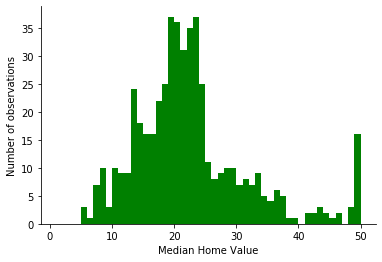

In [12]:
#Enter code
i = 0
bins = []
while i < 50:
    i += 1
    bins.append(i)

ax = plt.subplot()
ax.hist(boston['MEDV'], bins=bins, facecolor='green', edgecolor='none')
plt.xlabel('Median Home Value')
plt.ylabel('Number of observations')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

<font color='blue'>e) Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  </font>

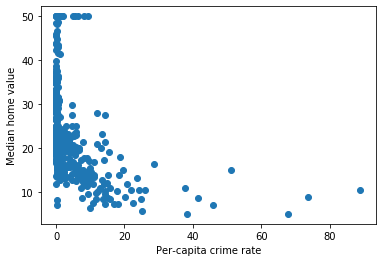

In [13]:
#Enter code
plt.figure()
plt.scatter(boston['CRIM'], boston['MEDV'])
plt.xlabel('Per-capita crime rate')
plt.ylabel('Median home value')
plt.show()

### 1. T-Tests

In [14]:
river_t = boston[boston.CHAS == 1]
river_f = boston[boston.CHAS == 0]

In [15]:
print(river_t['CHAS'].value_counts())
print(river_f['CHAS'].value_counts())

1.0    35
Name: CHAS, dtype: int64
0.0    471
Name: CHAS, dtype: int64


#### Conducting the T-Test and printing the results

In [16]:
mean_river_t = river_t['MEDV'].mean()
mean_river_f = river_f['MEDV'].mean()
print('Average price for neighborhoods near the Charles River:\t\t', mean_river_t)
print('Average price for neighborhoods not near the Charles River:\t', mean_river_f)

Average price for neighborhoods near the Charles River:		 28.439999999999998
Average price for neighborhoods not near the Charles River:	 22.093842887473464


In [17]:
tstat, pval = stats.ttest_ind(river_t['MEDV'].fillna(0), river_f['MEDV'].fillna(0))
print('t-stat:\t\t\t', tstat)
print('P-value:\t\t', pval)

t-stat:			 3.996437466090509
P-value:		 7.390623170519905e-05


#### <font color='blue'>EXCERCISE 2:</font> T-Test the relation of house prices and school quality

Many first-time home buyers are young families, who are looking for neighborhoods with good schools, their children can attend. Therefore a natural question is whether neighborhoods with better schools are systematically more expensive in terms of house prices than neighborhoods with low quality schools. We will investigate this question below using regression analysis, but can also look at it, using a simple T-test.

<font color='blue'>a) Create a school quality variable called "school_g", that is "yes" if the pupil to teacher ratio (PTRATIO) is below 16 and "no" otherwise. (Hint: use the numpy command "where", we used in lab 2.) Display your results as part of the dataset using the Pandas *head()* command.</font>

In [18]:
#Enter code
boston['school_g'] = np.where(boston['PTRATIO'] < 16, "yes", "no")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,school_g
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,yes
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,no
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,no
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,no
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,no


<font color='blue'>b) Now create two different subset variables, one containing neighborhoods with "good schools" are defined in exercise 2a (call this subset "gschool_1") and one subset of neighborhood without good schools (call this "gschool_0").</font>

In [19]:
#Enter code
gschool_1 = boston.loc[boston['school_g']=="yes"]
gschool_0 = boston.loc[boston['school_g']=="no"]

<font color='blue'>c) What is the average price for houses in neighborhoods with good schools? How does it differ from neighborhoods without good schools?</font>

In [20]:
#Enter code
print('Median home value in good school neighborhoods:', gschool_1['MEDV'].mean())
print('Median home value in good school neighborhoods:', gschool_0['MEDV'].mean())

Median home value in good school neighborhoods: 29.64875
Median home value in good school neighborhoods: 21.196478873239435


As we would expect, home values are higher if they are near a good school.

<font color='blue'>d) Conduct a T-test on whether prices in neighborhoods with good schools are statistically different from neighborhoods without good schools. What do you conclude from these tests?</font>

In [21]:
#Enter code
tstat, pval = stats.ttest_ind(gschool_1['MEDV'].fillna(0), gschool_0['MEDV'].fillna(0))
print('t-stat: \t', tstat)
print('p-val: \t\t', pval)
# Home values differences across neighborhoods are very statistically significant.

t-stat: 	 7.99865790105808
p-val: 		 8.689457290077605e-15


### 2. Univariate regression

In [22]:
# smf.ols?

In [23]:
uni_mod = smf.ols(formula='MEDV ~ CRIM', data=boston)
uni_result = uni_mod.fit()
print(uni_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.17e-19
Time:                        16:25:24   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

** Get estimates of parameters **

In [24]:
print(uni_result.params)

Intercept    24.033106
CRIM         -0.415190
dtype: float64


** Check the pvalues **

In [25]:
print(uni_result.pvalues)

Intercept    1.341723e-227
CRIM          1.173987e-19
dtype: float64


** Plot the regression model **


In [26]:
y_hat = uni_result.predict()

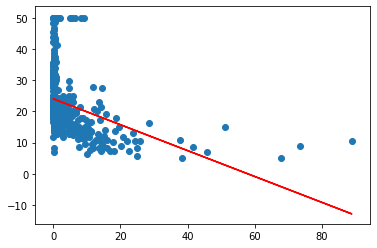

In [27]:
fig, ax = plt.subplots()
ax.plot(boston['CRIM'], y_hat, color = 'red')
ax.scatter(boston['CRIM'], boston['MEDV'])

#### <font color='blue'>EXCERCISE 3:</font>

<font color='blue'>Clean up the displayed regression graph by adding:</font>

* Labels for the x and y axis
* A title, describing what the graph captures
* Better definitions of the ranges for the axes, which should be from 0 to 50 for the y values and 0 to 100 for the x calues
* A grid, so the position of data points relative to axis values can be seen easily

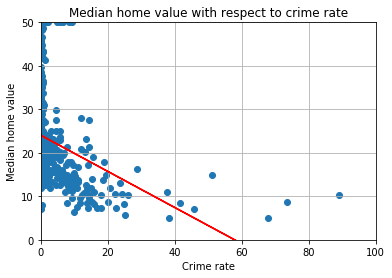

In [28]:
#Enter code
fig, ax = plt.subplots()
ax.plot(boston['CRIM'], y_hat, color = 'red')
ax.scatter(boston['CRIM'], boston['MEDV'])
ax.set_xlim([0, 100])
ax.set_ylim([0, 50])
plt.xlabel('Crime rate')
plt.ylabel('Median home value')
plt.title('Median home value with respect to crime rate')
plt.grid()

### 3.  Multivariate regressions

In [29]:
mul_mod = smf.ols(formula='MEDV ~ CRIM + PTRATIO', data = boston)
mul_result = mul_mod.fit(cov_type='HC3')
print(mul_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     76.38
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.08e-29
Time:                        16:25:25   Log-Likelihood:                -1742.2
No. Observations:                 506   AIC:                             3490.
Df Residuals:                     503   BIC:                             3503.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.3783      3.734     15.366      0.0

#### <font color='blue'>EXCERCISE 4:</font>
<font color='blue'>Run a univariate regression of house prices on (inverse) school quality as measured by the PTRATIO. How does your univariate regression coefficient compare to the multivariate regression coefficient from a regression of house prices on crime rates and (inverse) school quality? What could explain the differences?</font>




In [30]:
#Enter code
boston['inv_PTRATIO'] = 1/boston['PTRATIO']
school_mod = smf.ols(formula='MEDV ~ inv_PTRATIO', data=boston)
school_result = school_mod.fit(cov_type='HC3')
print(school_result.summary())

school_mod_mult = smf.ols(formula='MEDV ~ inv_PTRATIO + CRIM', data=boston)
school_result_mult = school_mod_mult.fit(cov_type='HC3')
print(school_result_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     116.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.43e-24
Time:                        16:25:25   Log-Likelihood:                -1768.6
No. Observations:                 506   AIC:                             3541.
Df Residuals:                     504   BIC:                             3550.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -11.7986      3.093     -3.815      

Taking crime rate into account lowers the magnitude of school quality but increases the intercept. Crime negatively affects home prices so the sign of the coefficient matches what we would expect. When we weren't including crime, the intercept and the inv_PTRATIO variable were being affected by the effects of Crime. When we include crime our model changes to correct for bias.

** Non-linear transformation of the predictors **


In [31]:
non_linear_mod = smf.ols(formula='MEDV ~ CRIM + np.power(CRIM, 2)', data = boston)
non_linear_result = non_linear_mod.fit()
print(non_linear_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     66.80
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           1.87e-26
Time:                        16:25:25   Log-Likelihood:                -1780.6
No. Observations:                 506   AIC:                             3567.
Df Residuals:                     503   BIC:                             3580.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.9281      0.42

** Interaction terms **


In [32]:
itr_mod = smf.ols(formula='MEDV ~ CRIM * PTRATIO', data = boston)
itr_result = itr_mod.fit(cov_type='HC3')
print(itr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     74.95
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.52e-40
Time:                        16:25:25   Log-Likelihood:                -1725.6
No. Observations:                 506   AIC:                             3459.
Df Residuals:                     502   BIC:                             3476.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.2465      3.891     17.798   

### 4. Tabular representation of regression models

Now let's run a full blown multivariate regression model with non-linear terms and make the output pretty, so you can display it in a report or on your website!

In [33]:
final_mod = smf.ols(formula='MEDV ~ CRIM + PTRATIO + NOX + CHAS + np.log(TAX)', data = boston)
final_result = final_mod.fit(cov_type='HC3')
print(final_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     79.11
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.67e-61
Time:                        16:25:25   Log-Likelihood:                -1706.3
No. Observations:                 506   AIC:                             3425.
Df Residuals:                     500   BIC:                             3450.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      71.9034      6.978     10.305      

In [34]:
v_name = final_result.params.index
result_df = pd.DataFrame(columns=['Coefficient','Standard Error','P-Value'], index = v_name)
result_df['Coefficient'] = final_result.params
result_df['Standard Error'] = final_result.bse
result_df['P-Value'] = final_result.pvalues
result_df

,Coefficient,Standard Error,P-Value
Intercept,71.903440,6.977769,6.713807e-25
CRIM,-0.131060,0.032443,5.350857e-05
PTRATIO,-1.608960,0.180658,5.286445e-19
NOX,-22.501600,3.580806,3.300824e-10
CHAS,5.298522,2.099072,1.159550e-02
np.log(TAX),-1.194963,1.272767,3.477975e-01


#### <font color='blue'>EXCERCISE 5:</font> (BONUS exercise on multivariate regressions)

<font color='blue'>a) Use the univariate regressions model from section 2, in combination with the Frisch-Waugh Theorem on multivariate regressions and show that you can estimate the effect of PTRATIO on house prices in the multivariate regression of house prices on CRIM, NOX, CHAS, log(TAX) and PTRATIO, by using three univariate regressions.</font>

 

In [35]:
#Enter code
boston['log_TAX'] = np.log(boston['TAX'])
mod1 = smf.ols(formula='MEDV ~ CRIM + NOX + CHAS + log_TAX', data=boston)
mod1_results = mod1.fit(cov_type='HC3')
residuals = mod1_results.resid

In [36]:
boston['residuals'] = residuals

In [37]:
mod2 = smf.ols(formula='PTRATIO ~ CRIM + NOX + CHAS + log_TAX', data=boston)
mod2_results = mod2.fit(cov_type='HC3')
residuals2 = mod2_results.resid
boston['residuals2'] = residuals2
residuals2

0     -2.538009
1      0.290198
2      0.290198
3      1.386324
4      1.385544
         ...   
501    3.480351
502    3.480720
503    3.480391
504    3.479352
505    3.480675
Length: 506, dtype: float64

In [38]:
mod3 = smf.ols(formula='residuals ~ residuals2', data=boston)

<font color='blue'>b) Display results in a clean table as shown in section 4.</font>

In [39]:
#Enter code
mod3_results = mod3.fit(cov_type='HC3')
print(mod3_results.summary())

                            OLS Regression Results                            
Dep. Variable:              residuals   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     80.74
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           5.17e-18
Time:                        16:25:25   Log-Likelihood:                -1706.3
No. Observations:                 506   AIC:                             3417.
Df Residuals:                     504   BIC:                             3425.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.469e-15      0.315    1.1e-14      1.0

<font color='blue'>c) Generate a scatter plot and regression graph as in section 2, but with the following stipulations:</font>
* Values of residuals of a regression of median home prices on CRIM, NOX, CHAS, and log property taxes on the y-axis, called **yresid**
* Values of residuals of a regression of PTRATIO on CRIM, NOX, CHAS, and log property taxes on the x-axis, called **xresid**
* A fitted line of the regression of **yresid on xresid**

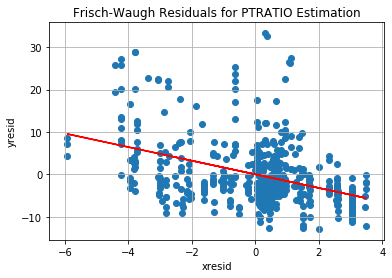

In [40]:
#Enter code
y_hat = mod3_results.predict()

fig, ax = plt.subplots()
ax.plot(boston['residuals2'], y_hat, color = 'red')
ax.scatter(boston['residuals2'], boston['residuals'])
plt.xlabel('xresid')
plt.ylabel('yresid')
plt.title('Frisch-Waugh Residuals for PTRATIO Estimation')
plt.grid()